In [17]:
import requests
import json

import numpy as np
import os
import time
import sys
import numpy as np

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# from mpltools import annotation

# some default font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

## Untils Defination

In [18]:
cmd_prefix = "./back-end-tests/manyRequest"

In [19]:
def run_command(cmd):
    return os.popen(cmd).read()

def get_run_time(result):
    prefix = "Time Cost:  "
    print(result)
    return float(result[result.index(prefix) + len(prefix):result.index(" ms")])

def get_request_url(pdiameter = 111,
    pdensity = 111,
    velocity = 111,
    theta = 45,
    tdensity = 2500,
    depth = 0,
    distance = 75):
    
    URL = """http://121.36.81.191/cgi-bin/crater.cgi?dist=%d&distanceUnits=1&diam=%d&diameterUnits=1&pdens=%d&pdens_select=0&vel=%d&velocityUnits=1&theta=%d&tdens=%d&wdepth=%d&wdepthUnits=1""" % (distance, pdiameter, pdensity, velocity, theta, tdensity, depth)
    return URL

In [20]:
def record_times_get(times, url, sleep = False):
    """
    paramters:
        times: slice or numpy.ndarray, 
                howMayTimes, request
        url: string
            address of get request
    """
    
    times = np.array(times)
    records = {}
    
    for t in times:
        params = " --url='%s' --requestMethod=get --requestTimes=%d" % (url, t)
        records[t] = get_run_time(run_command(cmd = cmd_prefix + params))
        if sleep:
            time.sleep(3*60)
    return records

def record_time_post(times, url,
                     pdiameter = 111,
                     pdensity = 111,
                     velocity = 111,
                     theta = 45,
                     tdensity = 2500,
                     depth = 0,
                     distance = 75,
                    sleep = False):
    
    """
    paramters:
        times: slice or numpy.ndarray, 
                howMayTimes, request
        url: string
            address of get request
    """
    
    times = np.array(times)
    records = {}
    params_data = " --impactor_density=%d --impactor_diameter=%d --impactor_velocity=%d --impactor_theta=%d --target_density=%d --target_depth=%d --target_distance=%d " % (
    pdensity, pdiameter, velocity, theta, tdensity, depth, distance)
    
    for t in times:
        params = " --url='%s' --requestMethod=post --requestTimes=%d " % (url, t)
        records[t] = get_run_time(run_command(cmd = cmd_prefix + params + params_data))
        if sleep:
            time.sleep(3*60)
        
    return records
    
    

In [21]:
run_command("git pull && cd back-end-tests/ && go build manyRequest.go")

'Already up to date.\n'

## Collect Runtime

### Old Web Tool

In [38]:
time.sleep(10)

In [22]:
times = [i for i in range(1, 500, 40)]
records = record_times_get(times, get_request_url(), sleep = True)

http://121.36.81.191:50052/simulator
Run request for 1 times to with Redis URL: http://121.36.81.191/cgi-bin/crater.cgi?dist=75&distanceUnits=1&diam=111&diameterUnits=1&pdens=111&pdens_select=0&vel=111&velocityUnits=1&theta=45&tdens=2500&wdepth=0&wdepthUnits=1 
<nil>Time Cost:  387 ms

http://121.36.81.191:50052/simulator
Run request for 41 times to with Redis URL: http://121.36.81.191/cgi-bin/crater.cgi?dist=75&distanceUnits=1&diam=111&diameterUnits=1&pdens=111&pdens_select=0&vel=111&velocityUnits=1&theta=45&tdens=2500&wdepth=0&wdepthUnits=1 
<nil><nil><nil><nil><nil><nil><nil><nil><nil><nil><nil><nil><nil><nil><nil><nil><nil><nil><nil><nil><nil><nil><nil><nil><nil><nil><nil><nil><nil><nil><nil><nil><nil><nil><nil><nil><nil><nil><nil><nil><nil>Time Cost:  2020 ms

http://121.36.81.191:50052/simulator
Run request for 81 times to with Redis URL: http://121.36.81.191/cgi-bin/crater.cgi?dist=75&distanceUnits=1&diam=111&diameterUnits=1&pdens=111&pdens_select=0&vel=111&velocityUnits=1&theta

In [23]:
records_post = record_time_post(times, "http://121.36.81.191:50052/simulator", sleep = True)

http://121.36.81.191:50052/simulator
Run request for 1 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  1109 ms

http://121.36.81.191:50052/simulator
Run request for 41 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  140 ms

http://121.36.81.191:50052/simulator
Run request for 81 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  226 ms

http://121.36.81.191:50052/simulator
Run request for 121 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  278 ms

http://121.36.81.191:50052/simulator
Run request for 161 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  461 ms

http://121.36.81.191:50052/simulator
Run request for 201 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  516 ms

http://121.36.81.191:50052/simulator
Run request for 241 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  618 ms

http://121.36.81.191:50

In [24]:
records_redis = record_time_post(times, "http://121.36.81.191:50052/simulatorWithRedis", sleep = True)

http://121.36.81.191:50052/simulator
Run request for 1 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  56 ms

http://121.36.81.191:50052/simulator
Run request for 41 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  19 ms

http://121.36.81.191:50052/simulator
Run request for 81 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  50 ms

http://121.36.81.191:50052/simulator
Run request for 121 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  51 ms

http://121.36.81.191:50052/simulator
Run request for 161 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  85 ms

http://121.36.81.191:50052/simulator
Run request for 201 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  133 ms

http://121.36.81.191:50052/simulator
Run request for 241 times to with Redis URL: http://121.36.81.191:50052/simula

In [25]:
x = list(records.keys())
y = [records[k] for k in x]
print((x,y))

x2 = list(records_post.keys())
y2 = [records_post[k] for k in x]

x3 = list(records_redis.keys())
y3 = [records_redis[k] for k in x]

data_index = [x, x2, x3]
data = [y, y2, y3]


([1, 41, 81, 121, 161, 201, 241, 281, 321, 361, 401, 441, 481], [387.0, 2020.0, 3985.0, 5896.0, 7795.0, 9984.0, 12402.0, 13768.0, 15575.0, 17679.0, 19777.0, 21517.0, 23813.0])


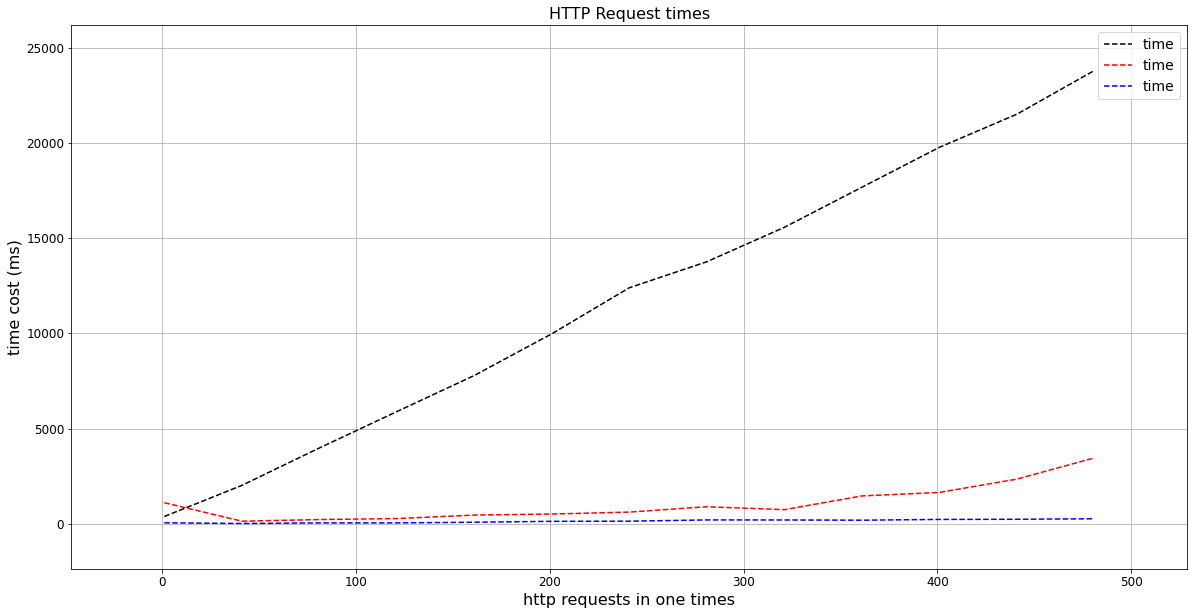

In [48]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)
ax1.grid(True)

color = ['k', 'r', 'b', 'g', 'c', 'y']
shape = ['-','.']
labels = ["original Impact Earth Program", "New ImpactEarth (based on golang)", "New ImpactEarth with redis(based on golang)"]

for i in range(len(data)):
    ax1.plot(data_index[i], data[i], '%s%s-'%(color[i%6], shape[0]), 
         label=labels[i)


ax1.set_xlabel('http requests in one times', fontsize=16)
ax1.set_ylabel('time cost (ms)', fontsize=16)
ax1.set_title('HTTP Request times', fontsize=16)
ax1.legend(loc='best', fontsize=14);

plt.savefig("../img/HTTP_Request_Time.png")

In [46]:
a = [1,2,3,4]
max(a)


4